In [1]:
import csv
import pandas as pd

In [2]:
def citiDataGenerator(fileName):
    with open("citibike.csv","r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            birthyear = row["birth_year"]
            if birthyear != "":
                age = 2021 - int(birthyear)
                yield age


In [3]:
count = {}
for age in citiDataGenerator("citibike.csv"):
    count[age] = count.get(age,0)+1

In [8]:
import pandas as pd
data = {"size": count.keys(),"count":count.values()}
df = pd.DataFrame.from_dict(data,orient="index")
df=df.transpose()
df

,size,count
0,43,1377
1,28,470
2,52,1133
3,36,1673
4,64,449
...,...,...
65,111,2
66,95,1
67,92,1
68,120,1


In [16]:
count_sum = sum(df['count'])

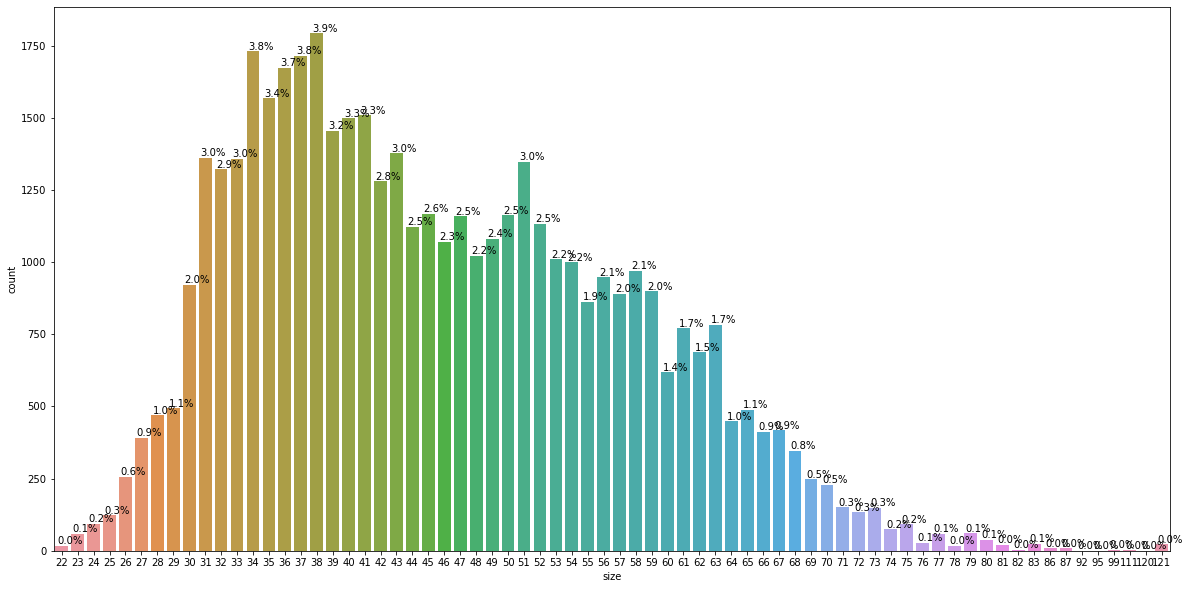

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(ax=ax,x = "size",y="count",data = df, ci = None)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/count_sum), (p.get_x()+0.1, p.get_height()+5))

In [18]:
print('Median age is 44')

Median age is 44
